# 1- Loading Libiraries

In [5]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
% matplotlib inline
import requests
import json


# 2- Gathering Data

In [6]:
# Importing enhanced twitter archive :
archive=pd.read_csv("twitter-archive-enhanced.csv")
archive.head()  #test

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# Downloading the tweet image predictions :
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)
    
image_p=pd.read_csv("image-predictions.tsv",sep='\t')
image_p.head()  #test

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# Reading 'tweet-json.txt'
df_list=[]

with open('tweet-json.txt') as file:
    for eachline in file:
        df_list.append(json.loads(eachline))

json.dumps(df_list[0])[:200]  #test


'{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut.'

In [9]:
# Getting the required data from the 'tweet-json.txt' (id , retweet count, favorite count)
tweet_df=pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])
tweet_df.head()   #test

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
#changing the name of id column to tweet_id
tweet_df=tweet_df.rename(columns={'id':'tweet_id'})
tweet_df.head()  #test

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
# Saving the dataframe to a csv file 
tweet_df.to_csv('tweet_df.csv',index=False)

#checking the file saved or not
df=pd.read_csv("tweet_df.csv")
df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# 3- Assessing Data

## 3.1 Assessing enhanced twitter archive data

In [12]:
# data display
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
# dataframe information
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [16]:
archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [17]:
#duplicated data
archive.duplicated().sum()

0

In [18]:
#checking rating_numerator less than 10
archive[archive.rating_numerator <10]['rating_numerator'].count()


440

In [19]:
# cheking which ids have numerator less than 10
archive[archive.rating_numerator < 10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [20]:
#cheking rating_numerator equal zero
archive[archive.rating_numerator == 0]['rating_numerator'].count()

2

In [21]:
# checking rating_denominator not equal 10
archive[archive.rating_denominator !=10]['rating_denominator'].count()

23

In [22]:
# checking rating_denominator less than 0
archive[archive.rating_denominator ==0]['rating_denominator'].count()

1

In [23]:
#Null vales
print("\nNull Values:\n",archive.isnull().sum()[archive.isnull().sum()>0])


Null Values:
 in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
dtype: int64


In [24]:
#dogs type values
print("\nDoggo Values:\n",archive['doggo'].value_counts().to_string())
print("\nFloofer Values:\n",archive['floofer'].value_counts().to_string())
print("\nPuppo Values:\n",archive['puppo'].value_counts().to_string())
print("\nPupper Values:\n",archive['pupper'].value_counts().to_string())


Doggo Values:
 None     2259
doggo      97

Floofer Values:
 None       2346
floofer      10

Puppo Values:
 None     2326
puppo      30

Pupper Values:
 None      2099
pupper     257


# Issues found in "twitter-archive-enhanced.csv"

## Quality issues :

### 1- rating_numerator with mean = 13.13
- Has 2 zero values
- Has 440 values less than 10
- Has values over the data range (1776)

### 2- rating_denominator with mean = 10.46
- Has a zero value
- Has 23 values not equal 10
- Has values over the data range (170)

### 3- Invalid tweet_id data type (integer istead of string)

### 4- invalid timestamp data type (string istead of datatime)

### 5- retweeted_status_id , retweeted_status_user_id & retweeted_status_timestamp have 2175 null values each.
### 6- there are 181 retweets as indicated by retweeted_status_id
### 7- doggo has 2259 "None" values.
### 8- pupper has 2099 "None" values

## Tidiness issues:

###  DoggoLingo (dogs' types) is separated into 4 columns 'doggo', 'floofer', 'pupper' & 'puppo'.



# 3.2 Assess the tweet image predictions

In [25]:
# data display
image_p.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
#Dataframe infomation
image_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# duplicated data 
image_p.duplicated().sum()

0

In [28]:
image_p.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
#count of failures to predict dog breed in 1st prediction
print(image_p['p1_dog'].value_counts().to_string())

True     1532
False     543


In [30]:
#count of success to predict dog breed in 2nd prediction for P1 failures
print(image_p[image_p['p1_dog']==0]['p2_dog'].value_counts().to_string())

False    388
True     155


# Issues found in "image-prediction.tsv"

   ## Quality issues :

   ### 1- Some 1st predictions aren't a breed of dog. 543 values

   ### 2- Names are typed with underscore separators.

   ### 3- Values of 2nd pedictions are a bread of dog for 1st failures. 155/543
   ### 4 - Missing photos for some IDs
   ### 5- Some predicted breeds are incalid (not breed of dogs)

## Tidiness issues :

   ### Breeds of dogs' valid predictions are distributed into 3 columns.
   
   

   
   
   # 3.3 Assessing the tweet data from Twitter API

In [31]:
df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# 4 - Cleaning Data

   ## 4.1 Creating copies of the data frames

In [33]:
archive_c = archive.copy() #cleaned "twitter-archive-enhanced.csv"
image_p_c = image_p.copy() #cleaned "image-prediction.tsv"
df_c = df.copy()  #cleaned "tweet-json.txt"

## 4.2  Tidiness issues :
###  Issue  -The dog stage data is separated into 4 columns.
### Define
- merge the 4 columns into 1 ,called dog_stage
### Code



In [57]:
archive_c['dog_stage']=archive_c['text'].str.extract('(doggo|floofer|pupper|puppo)')
archive_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [58]:
#drop unrequired columns 
archive_c=archive_c.drop(columns=['doggo','floofer','pupper','puppo'])

In [61]:
archive_c['dog_stage'].value_counts() #test

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

## Issue - All data is related but divided into 3 separate dataframes.

### Define
- Merge all dataframes into 1 using tweet_id
### Code

In [62]:
archive_c=pd.merge(archive_c,df_c, on='tweet_id',how='left')
archive_c=pd.merge(archive_c,image_p_c,on='tweet_id',how='left')

In [63]:
archive_c.info() #test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2

# 4.3 Cleaning quality isses
-not all quality issues must be cleaned just what you need for your analysis

### issue  - There are 181 retweets as indicated by retweeted_status_id

## Define
- Delete rows that represent retweets and all related columns

## Code



In [67]:
# keep tweets that have no retweet status id
archive_c=archive_c[archive_c.retweeted_status_id.isnull()]
archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 no

In [69]:
#delete ralated columns 
archive_c=archive_c.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [70]:
archive_c.info()  #test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf              

### issue  - Names are typed with underscore separators
## Define
- Convert invalid names (none or starting with lower case letters) to NAN and extract the correct names from the text column
## Code

In [83]:
archive_c.iloc[:,3]=archive_c.iloc[:,3].str.replace('_',' ', regex=True)
archive_c.iloc[:,6]=archive_c.iloc[:,6].str.replace('_',' ', regex=True)
archive_c.iloc[:,9]=archive_c.iloc[:,9].str.replace('_',' ', regex=True)


In [84]:
archive_c.head() #test

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog rates/status/891689557...,13,10,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


###  Issue  - invalid tweet_id data type 
## Define
- Correct invalid data type by converting to string
## Code

In [85]:
archive_c.tweet_id=archive_c.tweet_id.astype(str)

In [86]:
archive_c.info()  #test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

### Issue  - Invalid timestamp datatype
## Define
-Correct invalid data type by converting timestanp to datetime
## Code

In [89]:
archive_c.timestamp=pd.to_datetime(archive_c.timestamp)

In [90]:
archive_c.info()  #Test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
dog_stage                364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

### Issue  - Missing photos for some IDs (2075 rows instead of 2356)
## Define
- Delete rows with missing photos

## Code

In [91]:
archive_c=archive_c[archive_c.jpg_url.notnull()]

In [92]:
archive_c.info()  #test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1350 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

### issue  - Some predicted breeds are invalid (not breed of dogs)
## Define
- remove invalid predictions.
## Code

In [99]:
if 'p1' in archive_c:
    archive_c['p1'][archive_c['p1_dog']==0]=archive_c['p1_dog'][archive_c['p1_dog']==0].where(archive_c['p1_dog']==1,other="")
    archive_c['p2'][archive_c['p2_dog']==0]=archive_c['p2_dog'][archive_c['p2_dog']==0].where(archive_c['p2_dog']==1,other="")
    archive_c['p3'][archive_c['p3_dog']==0]=archive_c['p3_dog'][archive_c['p3_dog']==0].where(archive_c['p3_dog']==1,other="")
    
    print(archive_c[['p1','p1_dog']].head(10)) #test

                         p1 p1_dog
0                            False
1                 Chihuahua   True
2                 Chihuahua   True
3                            False
4                    Basset   True
5  Chesapeake_Bay_Retriever   True
6               Appenzeller   True
7                Pomeranian   True
8             Irish_Terrier   True
9                  Pembroke   True


###  Issue - tweet_id column is named only id
## Define
-rename column to "tweet_id".
## test


In [100]:
df_c.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


# 5- Saving Data to twitter_archive_master.csv

In [101]:
archive_c.to_csv('twitter_archive_master.csv')

# 6- Data Analysis and Visualization
## A. The percentage of different dog stages

In [102]:
st_df=archive_c.dog_stage.value_counts()
st_df

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

(-1.1119567536873245,
 1.1005693692232059,
 -1.1272417297181638,
 1.108146315205716)

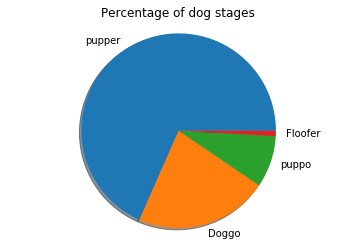

In [105]:
# converting a pie chart 
plt.pie(st_df,
       labels=['pupper','Doggo','puppo','Floofer'],
       shadow = True)
plt.title('Percentage of dog stages')
plt.axis('equal')

### insights 
- Pupper has the highest percentage.
- Floofer has the lowest percentage.


##  B .Favorite count and retweet count relationship

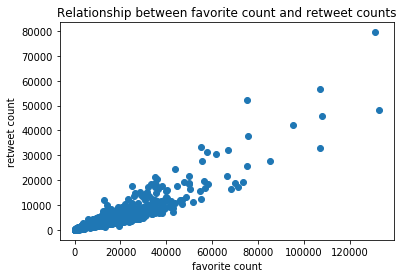

In [107]:
plt.scatter(archive_c.favorite_count,archive_c.retweet_count);
plt.title('Relationship between favorite count and retweet counts');
plt.xlabel('favorite count');
plt.ylabel('retweet count');

### Insights
-There is a direct relationship between favorite count and retweet count.